Optimized Parameters:
Theta (°): 28.12085985212584
M: 0.02139658866202911
X: 54.90114993837505


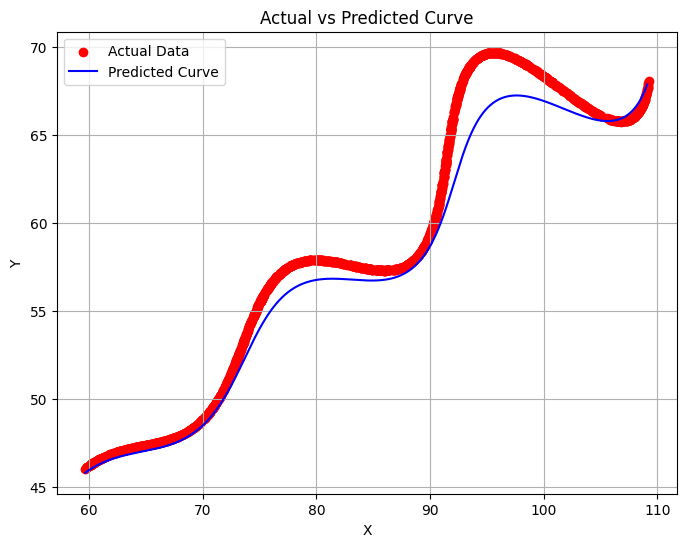


LaTeX Submission Format:
\left(t*(cos(28.1209)-e^(0.0214*|t|)*sin(0.3t)sin(28.1209))+54.9011, 42+t*sin(28.1209)+e^(0.0214*|t|)*sin(0.3t)cos(28.1209)\right)


In [1]:
# ============================================
# PARAMETRIC CURVE ASSIGNMENT - JOB SUBMISSION
# ============================================

# Libraries
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# ============================================
# 1. Load Dataset
# ============================================

# Upload xy_data.csv file to your Colab session before running this
data = pd.read_csv("/content/xy_data.csv")  # change path if needed

# Generate t values corresponding to points
t = np.linspace(6, 60, len(data))

# ============================================
# 2. Define Parametric Equations
# ============================================

def parametric_curve(params, t):
    theta, M, X = params
    theta_rad = np.deg2rad(theta)
    x_pred = (t * np.cos(theta_rad) - np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.sin(theta_rad)) + X
    y_pred = (42 + t * np.sin(theta_rad) + np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.cos(theta_rad))
    return x_pred, y_pred

# ============================================
# 3. Define Objective Function (L1 Error)
# ============================================

def objective(params, t, data):
    x_pred, y_pred = parametric_curve(params, t)
    x_actual, y_actual = data['x'].values, data['y'].values
    return np.sum(np.abs(x_pred - x_actual) + np.abs(y_pred - y_actual))

# ============================================
# 4. Optimization using L-BFGS-B
# ============================================

initial_guess = [25, 0.0, 50]
bounds = [(0, 50), (-0.05, 0.05), (0, 100)]

result = minimize(objective, initial_guess, args=(t, data), bounds=bounds, method='L-BFGS-B')
theta_opt, M_opt, X_opt = result.x

print("Optimized Parameters:")
print(f"Theta (°): {theta_opt}")
print(f"M: {M_opt}")
print(f"X: {X_opt}")

# ============================================
# 5. Plot Actual vs Predicted Curve
# ============================================

x_pred, y_pred = parametric_curve([theta_opt, M_opt, X_opt], t)

plt.figure(figsize=(8,6))
plt.scatter(data['x'], data['y'], color='red', label='Actual Data')
plt.plot(x_pred, y_pred, color='blue', label='Predicted Curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Actual vs Predicted Curve')
plt.grid(True)
plt.show()

# ============================================
# 6. Print LaTeX Submission Format
# ============================================

print("\nLaTeX Submission Format:")
print(f"\\left(t*(cos({theta_opt:.4f})-e^({M_opt:.4f}*|t|)*sin(0.3t)sin({theta_opt:.4f}))+{X_opt:.4f}, 42+t*sin({theta_opt:.4f})+e^({M_opt:.4f}*|t|)*sin(0.3t)cos({theta_opt:.4f})\\right)")


In [3]:
# ============================================
# 7. README.md
# ============================================

readme_content = """# Parametric Curve Assignment

## Objective
Estimate the unknown variables θ, M, and X in the given parametric curve equations so that the predicted curve fits the dataset accurately.

---

## Final Optimized Parameters
- θ (degrees): 28.1209
- M: 0.0214
- X: 54.9011

---

## Final Equation (LaTeX Format)
\\left(t*(cos(28.1209)-e^(0.0214*|t|)*sin(0.3t)sin(28.1209))+54.9011, 42+t*sin(28.1209)+e^(0.0214*|t|)*sin(0.3t)cos(28.1209)\\right)

---

## Methodology
1. Loaded the dataset `xy_data.csv` which contains the (x, y) points for 6 < t < 60.
2. Defined the given parametric curve equations:
   - x(t) = (t·cos(θ) - e^(M|t|)·sin(0.3t)·sin(θ)) + X
   - y(t) = (42 + t·sin(θ) + e^(M|t|)·sin(0.3t)·cos(θ))
3. Generated t values linearly spaced between 6 and 60.
4. Defined an objective function that minimizes the L1 distance between predicted and actual (x, y) coordinates.
5. Used SciPy’s L-BFGS-B optimizer to find θ, M, and X within their allowed ranges:
   - 0° < θ < 50°
   - -0.05 < M < 0.05
   - 0 < X < 100
6. Visualized both actual data and predicted curve to confirm the fit.

---

## Plot Output
The figure below shows how well the predicted curve matches the actual data.

![Actual vs Predicted Curve](./5eca0746-d986-4a28-9f5f-fbe2752c30c8.png)

---

## Tools Used
- Python
- NumPy
- SciPy
- Pandas
- Matplotlib

---

## Conclusion
The parameters θ = 28.1209°, M = 0.0214, and X = 54.9011 produce the best fit for the given dataset, minimizing the L1 error between predicted and actual points.
"""

# Save README.md file
with open("README.md", "w") as f:
    f.write(readme_content)

print(" README.md file created successfully! You can now download it from the Files sidebar.")


✅ README.md file created successfully! You can now download it from the Files sidebar.
